<a href="https://colab.research.google.com/github/syadav4320/Image-Multi-Classification-and-N-similarity/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install livelossplot

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import requests
# import splitfolders
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/ML/Eyewear/eyewear_ml_challenge.csv')
df.head()

,Unnamed: 0,product_name,product_id,parent_category,Image_Front,frame_shape
0,0,Vintage Persona C4,7641,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
1,1,Vintage Crazy-X C2 Red,7643,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
2,2,Jialedi Eyewear 1086 C8 Blue,8254,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
3,3,Jialedi Eyewear 1086 C6 Red,8255,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
4,4,Jialedi Eyewear 1086 C4 Tortoise Transperent,8256,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df.Image_Front[2989]
# df.shape[0]

5569

### Function to label the images

In [ ]:
# def labeler(df):
#     if (df['parent_category'] == 'eyeframe') & (df['frame_shape'] == 'Rectangle'):
#         return 'eyeframe+Rectangle'
#     elif (df['parent_category'] == 'eyeframe') & (df['frame_shape'] == 'Aviator'):
#         return 'eyeframe+Aviator'
#     elif(df['parent_category'] == 'eyeframe') & (df['frame_shape'] == 'Wayfarer'):
#         return 'eyeframe+Wayfarer'
#     elif (df['parent_category'] == 'eyeframe') & (df['frame_shape'] == 'Oval'):
#         return 'eyeframe+Oval'
#     elif (df['parent_category'] == 'sunglasses') & (df['frame_shape'] == 'Rectangle'):
#         return 'sunglasses+Rectangle'
#     elif (df['parent_category'] == 'sunglasses') & (df['frame_shape'] == 'Aviator'):
#         return 'sunglasses+Aviator'
#     elif (df['parent_category'] == 'sunglasses') & (df['frame_shape'] == 'Wayfarer'):
#         return 'sunglasses+Wayfarer'
#     elif (df['parent_category'] == 'sunglasses') & (df['frame_shape'] == 'Oval'):
#         return 'sunglasses+Oval'
#     elif (df['parent_category'] == 'Non-Power Reading') & (df['frame_shape'] == 'Rectangle'):
#         return 'NonPower+Rectangle'
#     elif (df['parent_category'] == 'Non-Power Reading') & (df['frame_shape'] == 'Aviator'):
#         return 'NonPower+Aviator'
#     elif (df['parent_category'] == 'Non-Power Reading') & (df['frame_shape'] == 'Wayfarer'):
#         return 'NonPower+Wayfarer'
#     elif(df['parent_category'] == 'Non-Power Reading') & (df['frame_shape'] == 'Oval'):
#         return 'NonPower+Oval'
    
# df['labels'] = df.apply(labeler, axis=1)

### Setting the empty the folders


In [ ]:
# main_folder = r'C:\Users\Idea-PC\Desktop\Prepleaf\ML\Eye_wear\Main_eye'
# os.makedirs(main_folder, exist_ok=True)
# subfolder_names = df['labels'].unique().tolist()
# for item in subfolder_names:
#     os.makedirs(os.path.join(main_folder, item),exist_ok=True)


### Extracting the images

In [ ]:
# for i in df.shape[0]:
#     with requests.get(df.Image_Front[i], stream=True) as r:
#         with open(main_folder+'\\'+ df.labels[i]+'\\'+ 'Image'+ str(i) +'.jpg', "wb") as f:
#             for chunk in r.iter_content(chunk_size=1024):
#                 if chunk:
#                     f.write(chunk)

### splitting the dataset

In [ ]:
# folder1 = os.path.join(r'C:\Users\Idea-PC\Desktop\Prepleaf\ML\Eye_wear','eye1')
# folder2 = os.path.join(r'C:\Users\Idea-PC\Desktop\Prepleaf\ML','eye1_copy')

In [ ]:
# splitfolders.ratio(main_folder, output=folder2, seed=1337,ratio=(.7, .21, .09),  group_prefix=None)
# splitfolders.fixed(main_folder, output=folder2, seed=1337,fixed=(1000,50),  group_prefix=None) 

Copying files: 5534 files [04:45, 19.36 files/s]


### checking unbalanced train dataset

In [ ]:
# value = []
# cls = []
# for dir,subdir,files in os.walk(folder1+'\\'+'train'):
#     value.append(len(files))
#     cls.append(subdir)
# value.pop(0)
# cls = cls.pop(0)

In [ ]:
# plt.figure(figsize=(7,7))
# plt.xticks(rotation=90)
# plt.bar(cls,value)

In [ ]:
# data generator for training set
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2, # random application of shearing
    # zoom_range = 0.2,
    horizontal_flip = True) # randomly flipping half of the images horizontally

# data generator for test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
batch_size = 100
train_generator = train_datagen.flow_from_directory(
    r'/content/drive/MyDrive/ML/Eyewear/eye1/train',
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=True,
    seed=42)

# generator for reading validation data from folder
validation_generator = test_datagen.flow_from_directory(
    r'/content/drive/MyDrive/ML/Eyewear/eye1/val',
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=True,
    seed=42)

# generator for reading test data from folder
test_generator = test_datagen.flow_from_directory(
    r'/content/drive/MyDrive/ML/Eyewear/eye1/test',
    target_size = (224, 224),
    color_mode = 'rgb',
    batch_size = 10,
    class_mode = 'categorical',
    shuffle = False)


Found 3868 images belonging to 12 classes.
Found 1156 images belonging to 12 classes.
Found 510 images belonging to 12 classes.


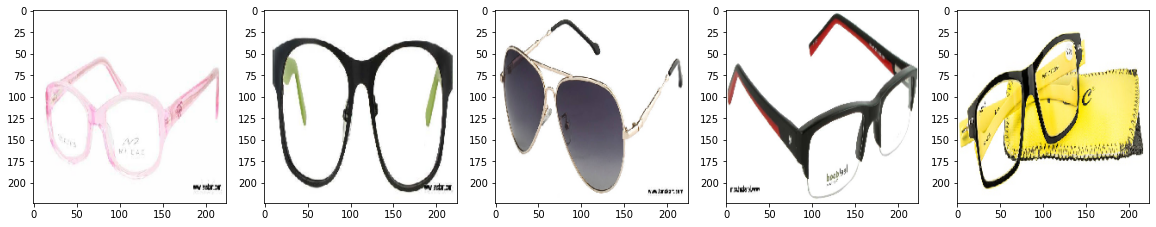

In [ ]:
x_tr,y_tr= next(train_generator)
plt.figure(figsize=(20,10))
c = 5
for i in range(c):
    plt.subplot(5/c+1,c,i+1)
    plt.imshow(x_tr[i])

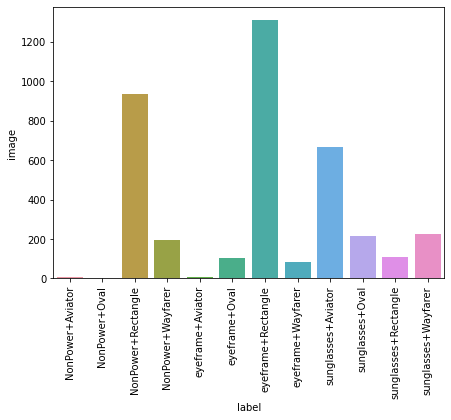

In [ ]:
d1= pd.DataFrame(list(zip(train_generator.filenames,train_generator.labels)),columns = ['image','code'])
d2 = pd.DataFrame(train_generator.class_indices.items(), columns = ['label','code'])
d = d1.merge(d2, on ='code').groupby('label')['image'].size().reset_index(name = 'image')

plt.figure(figsize = (7,5))
s = sns.barplot(data = d,x = 'label', y = 'image')
s.set_xticklabels(list(train_generator.class_indices.keys()), rotation=90)

plt.show()



In [ ]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=12
fine_tune=0

n_steps =len(train_generator.filenames) // batch_size
n_val_steps = len(validation_generator.filenames)// batch_size
n_epochs = 10



In [ ]:
conv_base = VGG16(include_top=False,
                weights='imagenet', 
                input_shape=input_shape)

if fine_tune > 0:
    for layer in conv_base.layers[:-fine_tune]:
        layer.trainable = False
else:
    for layer in conv_base.layers:
        layer.trainable = False

# Create a new 'top' of the model (i.e. fully-connected layers).
# This is 'bootstrapping' a new top_model onto the pretrained layers.
top_model = conv_base.output
top_model = Flatten(name="flatten")(top_model)
top_model = Dense(4096, activation='relu')(top_model)
top_model = Dense(1072, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)
output_layer = Dense(n_classes, activation='softmax')(top_model)

# Group the convolutional base and new fully-connected layers into a Model object.
model = Model(inputs=conv_base.input, outputs=output_layer)

# Compiles the model for training.
model.compile(optimizer=optim_1, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
from livelossplot import PlotLossesKeras
from livelossplot.keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath=r'/content/drive/MyDrive/ML/Eyewear/tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=6,
                           restore_best_weights=True,
                           mode='min')

In [ ]:
%%time 

vgg_history = model.fit(train_generator,
                            batch_size=batch_size,
                            epochs=n_epochs,
                            validation_data=validation_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [ ]:
# Generate predictions
model.load_weights(r'/content/drive/MyDrive/ML/Eyewear/tl_model_v1.weights.best.hdf5') # initialize the best trained weights

true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = model.predict(test_generator)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

In [ ]:
vgg_pred_classes = np.argmax(vgg_preds, axis=1)
vgg_pred_classes

In [ ]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy  without Fine-Tuning : {:.2f}%".format(vgg_acc * 100))


VGG16 Model Accuracy  without Fine-Tuning : 88.43%


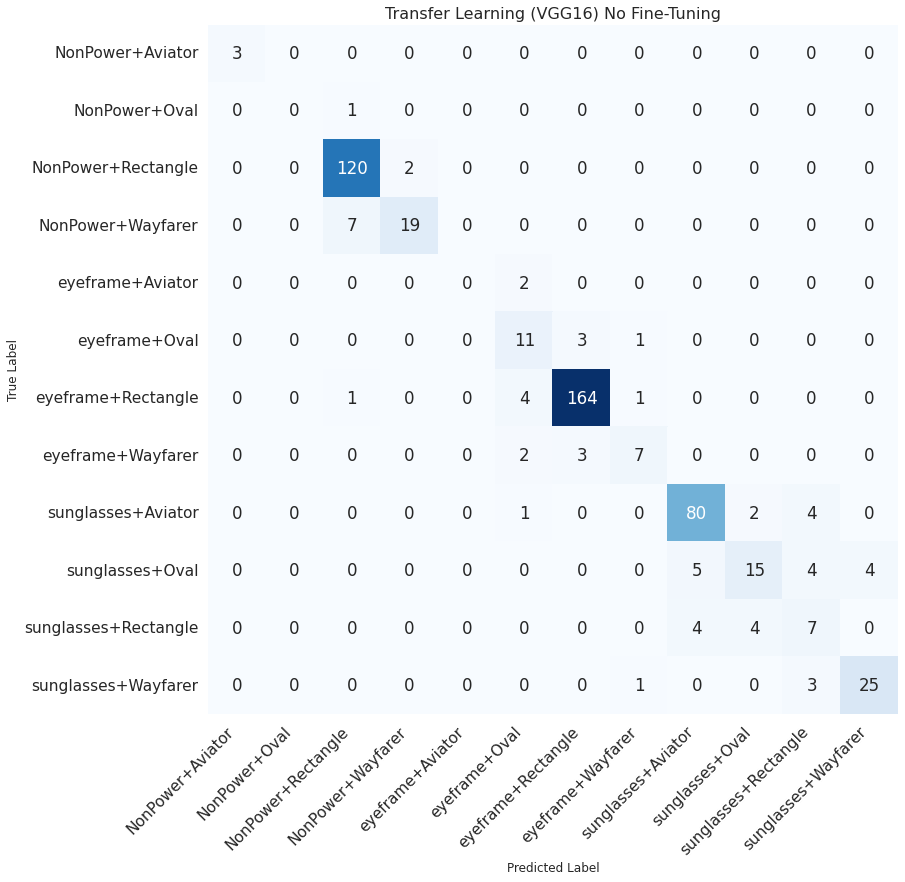

In [ ]:
# Get the names of the ten classes
class_names = test_generator.class_indices.keys()

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, ax2 = plt.subplots(1, 1, figsize=(12, 10))
plot_heatmap(true_classes, vgg_pred_classes, class_names, ax2, title="Transfer Learning (VGG16) No Fine-Tuning")    

fig.tight_layout()
fig.subplots_adjust(top=1.25)
plt.show()

In [ ]:
test_files_names = test_generator.filenames
predictions = model.predict_generator(test_generator,
                                      steps = 1531)
predictions_df = pd.DataFrame(predictions, columns = ['invasive'])
predictions_df.insert(0, "name", test_files_names)
predictions_df['name'] = predictions_df['name'].map(lambda x: x.lstrip('test\\').rstrip('.jpg'))
predictions_df['name'] = pd.to_numeric(predictions_df['name'], errors = 'coerce')
predictions_df.sort_values('name', inplace = True)
predictions_df.to_csv('predictions_df.csv', index = False)